<a href="https://colab.research.google.com/github/farhanrizkyyyy/quiz4-praktikum-pembelajaran-mesin/blob/master/Quiz_4_Pembelajaran_Mesin_1197050041_Farhan_Rizky_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/diabetes.csv')
data.describe()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


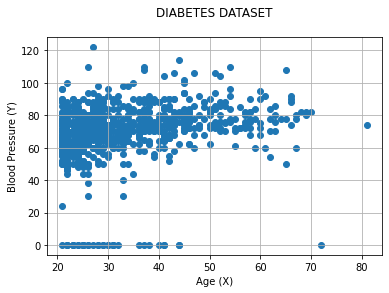

In [ ]:
plt.scatter(data.Age, data.BloodPressure)
plt.title('DIABETES DATASET\n')
plt.xlabel('Age (X)')
plt.ylabel('Blood Pressure (Y)')
plt.grid(True)
plt.show()

In [ ]:
scalerX = StandardScaler().fit_transform(data)
scalerX = data.iloc[:, 7].values
scalerY = data.iloc[:, 2].values
scalerX = scalerX.reshape(-2,1)
scalerY = scalerY.reshape(-2,1)

X_train, X_test, y_train, y_test = train_test_split(scalerX, scalerY, test_size = 0.2, random_state = 0)

ssX = StandardScaler()
ssY = StandardScaler()
scalerX = ssX.fit_transform(scalerX)
scalerY = ssY.fit_transform(scalerY)

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(scalerX, scalerY.ravel())

RandomForestRegressor()

In [ ]:
y_pred = regressor.predict(ssX.transform(np.array([[1.3]])))
y_pred = y_pred.reshape(-1, 1)
y_pred = ssY.inverse_transform(y_pred)

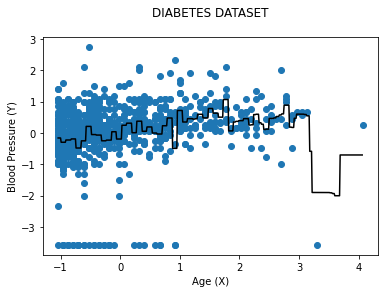

In [ ]:
X_grid = np.arange(min(scalerX), max(scalerX), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scalerX, scalerY)
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('DIABETES DATASET\n')
plt.xlabel('Age (X)')
plt.ylabel('Blood Pressure (Y)')
plt.show()